# The criminal netwrok analysis

The data and the project were originally part of the course [MITx 6.419x Data Analysis: Statistical Modeling and Computation in Applications](https://www.edx.org/course/statistics-computation-and-applications) I have completed in the past

The data describes the evolution of the criminal network split into phases. During first 3 pahses there was no intervention by the police. The intervention were in the form of seizing the drugs without arresting the members of the netwrok. This acctions created disturbances in the network forcing them to change the shape and properties of the network.


In [58]:
import numpy as np
import pandas as pd
import networkx as nx
from numpy import genfromtxt
import matplotlib.pyplot as plt
import pygraphviz as pgv
import graphviz as gv
import warnings
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from community import community_louvain # for nxv2
import matplotlib.cm as cm

warnings.filterwarnings("ignore")


In [59]:
# loading the data and transfroming to the graph representation using the networkX library
phases = {}
G = {}
A = {}
# looping through phases 
for i in range(1,12): 
  var_name = "phase" + str(i)
  file_name = "https://raw.githubusercontent.com/ragini30/Networks-Homework/main/" + var_name + ".csv"
  phases[i] = pd.read_csv(file_name, index_col = ["players"])
  phases[i].columns = "n" + phases[i].columns
  phases[i].index = phases[i].columns
  # creatiing networkX graph
  G[i] = nx.from_pandas_adjacency(phases[i])
  G[i].name = var_name
  # calculating degree centrality ot be used as size he nodes
  degree_c = nx.degree_centrality(G[i])
  between_c = nx.betweenness_centrality(G[i])
  eigen_c = nx.eigenvector_centrality(G[i])


  # setting attributes of the nx graph
  nx.set_node_attributes(G[i], degree_c, "degree")
  nx.set_node_attributes(G[i], between_c, "betweeness")
  nx.set_node_attributes(G[i], eigen_c, "eigen")

  A[i] = nx.nx_agraph.to_agraph(G[i])
  # Setting node size attribute in pygraphviz object
  for node in A[i].nodes():
      node.attr['width'] = node.attr['degree'] * 100
      node.attr['height'] = node.attr['degree'] * 100




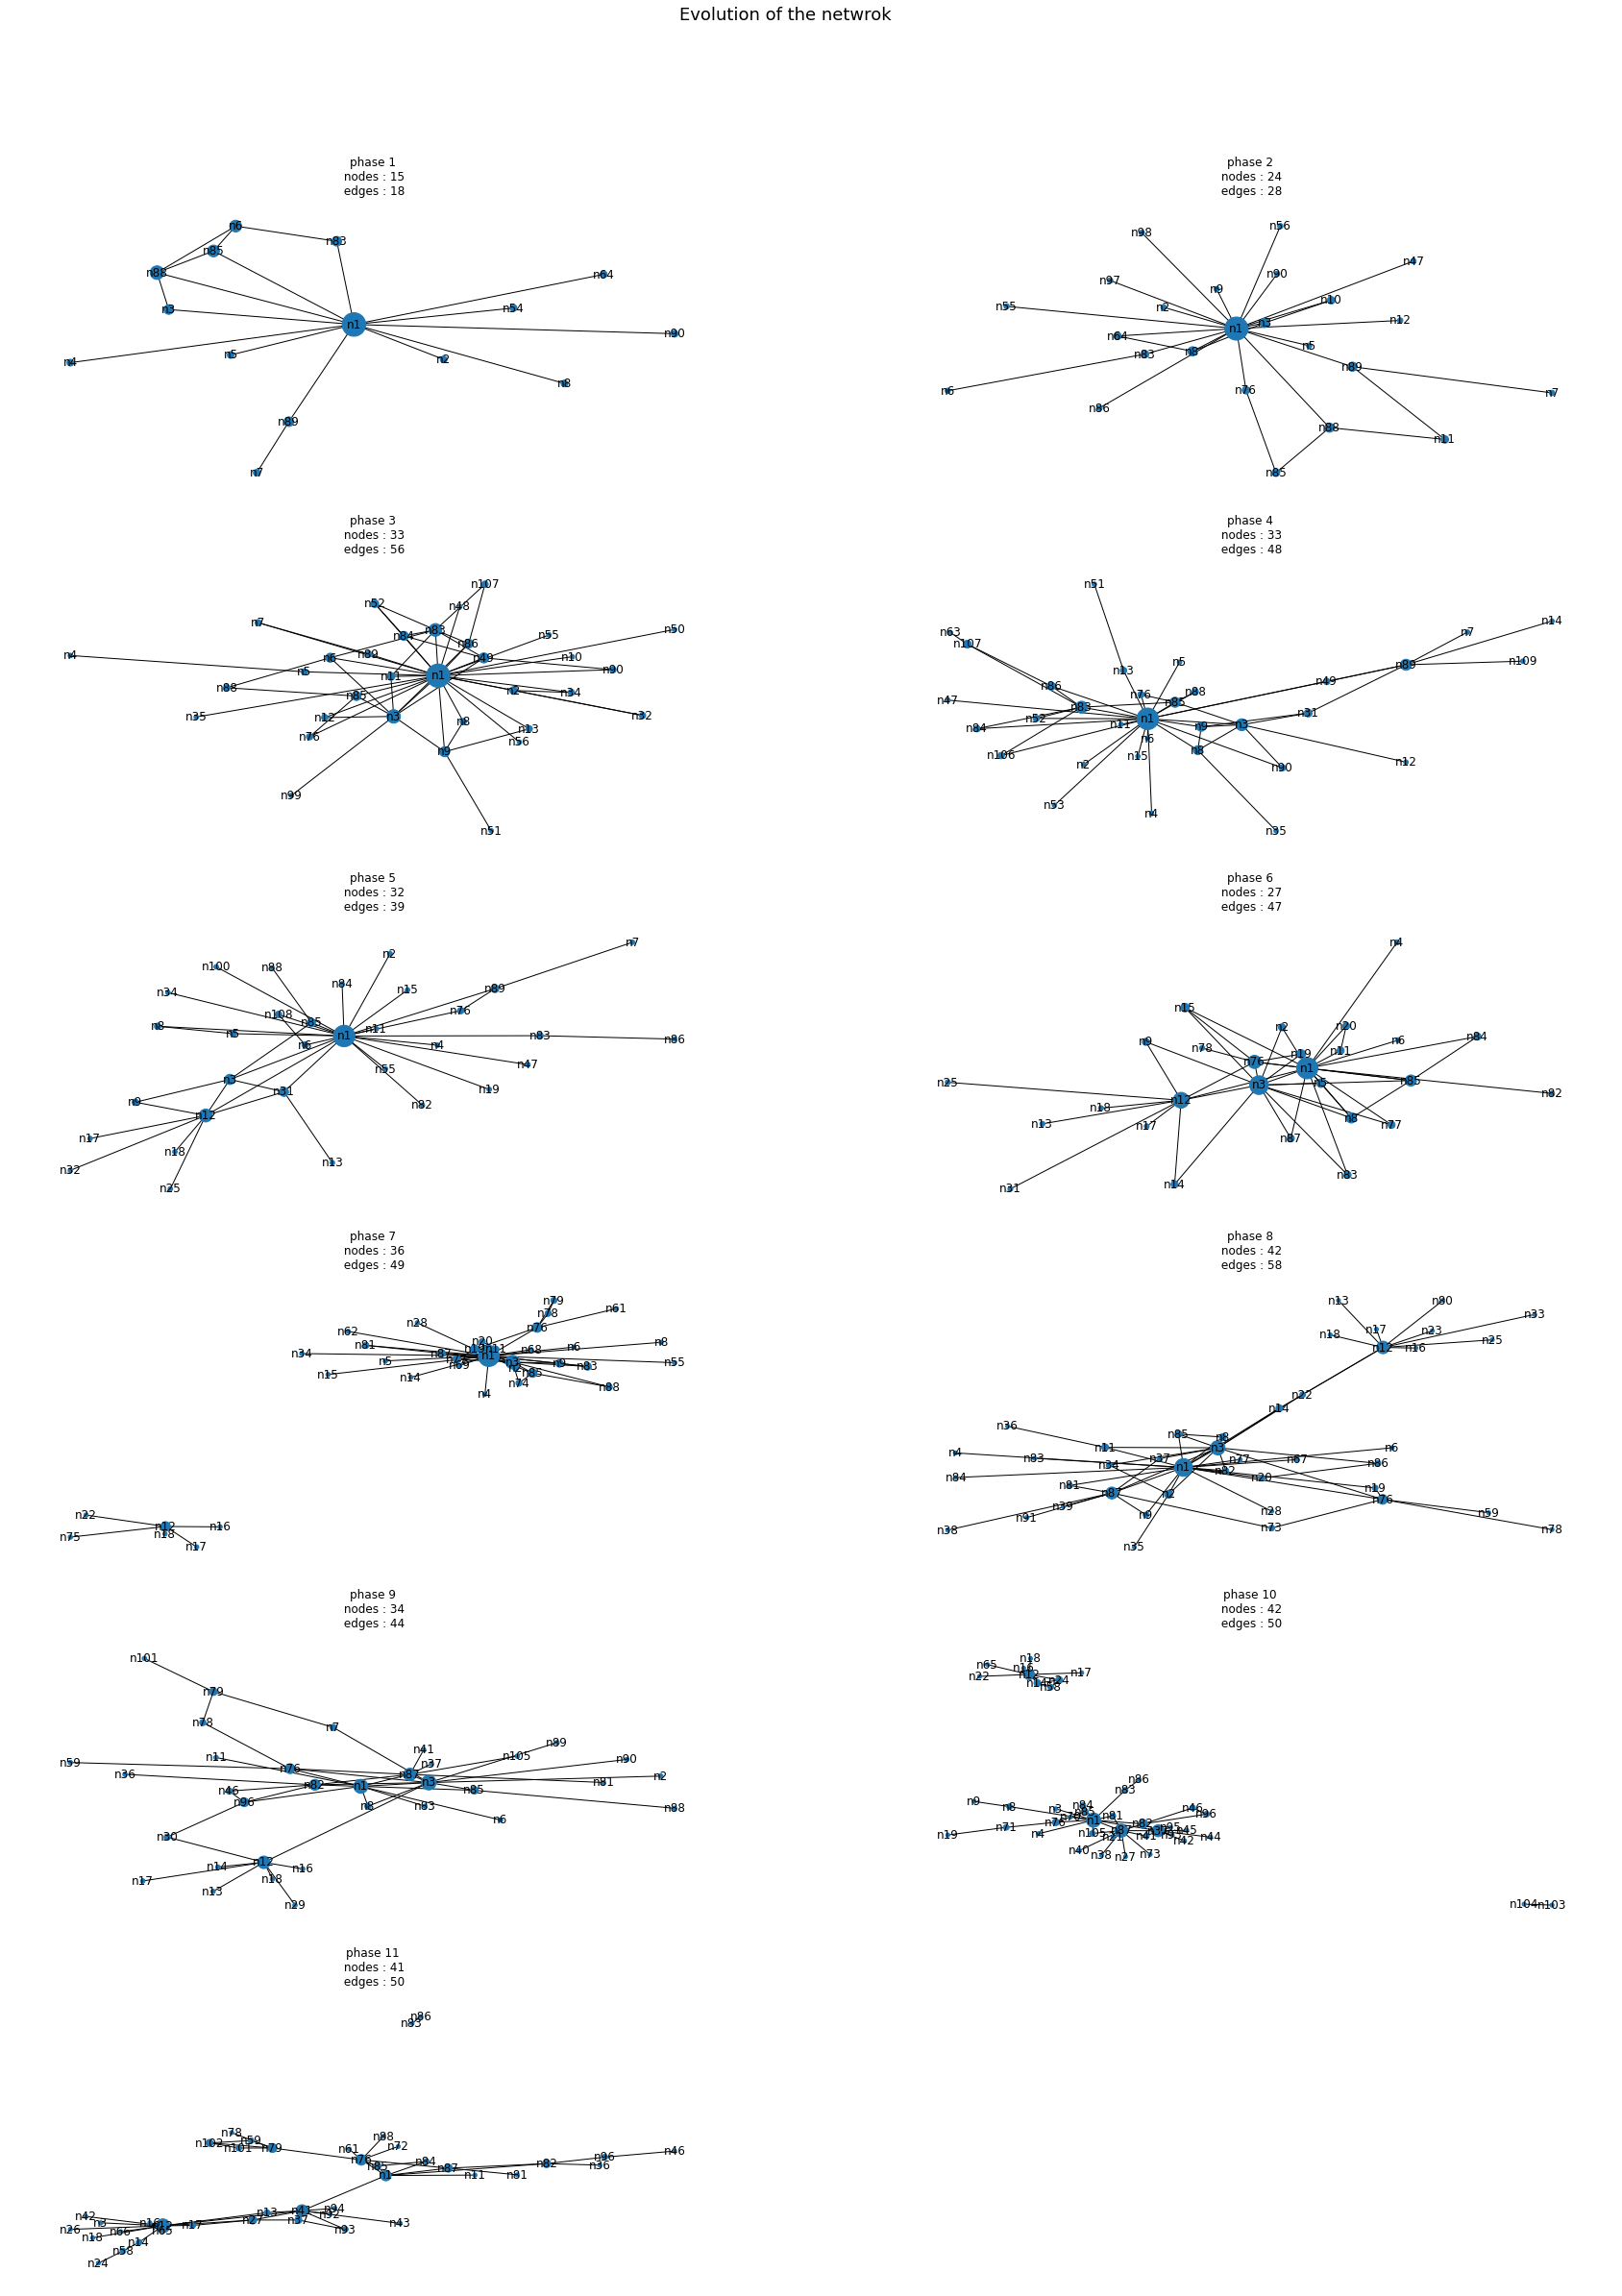

In [27]:
# creating plot grid
fig, axs = plt.subplots(squeeze=True,nrows=6, ncols=2, figsize=(30, 40),)
fig.subplots_adjust(hspace=0.2)
#title
fig.suptitle("Evolution of the netwrok", fontsize=18, y=0.95)

# loop throught the phases and draw them 
for i, ax in zip(range(len(A)), axs.ravel()):
    ax.set_title(f"phase {i+1}" + "\n" + f" nodes : {G[i+1].number_of_nodes()}"+ "\n" +
                 f" edges : {G[i+1].number_of_edges()}" )
    ns = nx.degree_centrality(G[i+1]) # get the degree centrality for each node
    nx.draw(G[i+1], with_labels=True, ax=ax,node_size=[i*700 for i in ns.values()])
    # convert to pygraphviz for better visualization later
    A[i+1].layout()
    A[i+1].draw('networkx_graph.png')


fig.delaxes(axs[5,1]) # delete the empty ax in fig
fig.show()

Above we could see how the criminal netwrok was evolving. During the first 3 phases we can notice large increase in the size. The number of nodes representing the actors in the network more than doubled
We could speculated about why is that. One possibility is to attribute this behavior of the netwrok to lack of police intervention in this period

We can have a better look at these 3 phases 
The size of the node represents the degree centrality of the node

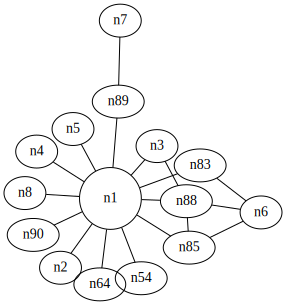

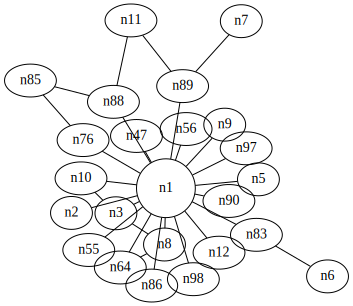

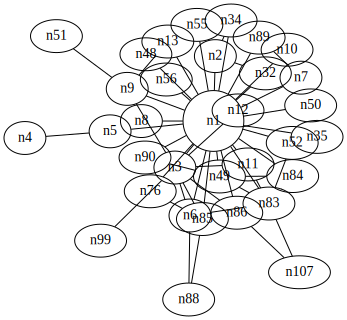

In [28]:
display(A[1])
display(A[2])
display(A[3])


After the phase 3 there were number of interventions that made netwrok to undergo some changes

<table class="tabular" cellspacing="0" style="table-layout:auto"><tbody><tr><td style="text-align:left; border-right:1px solid black; border:none">
Phase 4 </td><td style="text-align:left; border-right:1px solid black; border:none">
 1 seizure </td><td style="text-align:left; border-right:1px solid black; border:none">
 $2,500,000 </td><td style="text-align:left; border:none">
 300 kg of marijuana </td></tr><tr><td style="text-align:left; border-right:1px solid black; border:none">
Phase 6 </td><td style="text-align:left; border-right:1px solid black; border:none">
 3 seizures </td><td style="text-align:left; border-right:1px solid black; border:none">
 $1,300,000 </td><td style="text-align:left; border:none">
 2 x 15 kg of marijuana + 1 x 2 kg of cocaine </td></tr><tr><td style="text-align:left; border-right:1px solid black; border:none">
Phase 7 </td><td style="text-align:left; border-right:1px solid black; border:none">
 1 seizure </td><td style="text-align:left; border-right:1px solid black; border:none">
 $3,500,000 </td><td style="text-align:left; border:none">
 401 kg of marijuana </td></tr><tr><td style="text-align:left; border-right:1px solid black; border:none">
Phase 8 </td><td style="text-align:left; border-right:1px solid black; border:none">
 1 seizure </td><td style="text-align:left; border-right:1px solid black; border:none">
 $360,000 </td><td style="text-align:left; border:none">
 9 kg of cocaine </td></tr><tr><td style="text-align:left; border-right:1px solid black; border:none">
Phase 9 </td><td style="text-align:left; border-right:1px solid black; border:none">
 2 seizures </td><td style="text-align:left; border-right:1px solid black; border:none">
 $4,300,000 </td><td style="text-align:left; border:none">
 2 kg of cocaine + 1 x 500 kg marijuana </td></tr><tr><td style="text-align:left; border-right:1px solid black; border:none">
Phase 10 </td><td style="text-align:left; border-right:1px solid black; border:none">
 1 seizure </td><td style="text-align:left; border-right:1px solid black; border:none">
 $18,700,000 </td><td style="text-align:left; border:none">
 2200 kg of marijuana </td></tr><tr><td style="text-align:left; border-right:1px solid black; border:none">
Phase 11 </td><td style="text-align:left; border-right:1px solid black; border:none">
2 seizures </td><td style="text-align:left; border-right:1px solid black; border:none">
 $1,300,000 </td><td style="text-align:left; border:none">
 12 kg of cocaine + 11 kg of cocaine </td></tr></tbody></table>

In [29]:
for i in range(4,12):
    for node in A[i].nodes():
        if node=="n12":
            node.attr["color"] = "red"


After phase 4 we have another actor in the network. It is a interesting node ot keep in mind since it represents  
the intermediary who was responsible for rerouting some of the drugs form Colombia to Serero organization

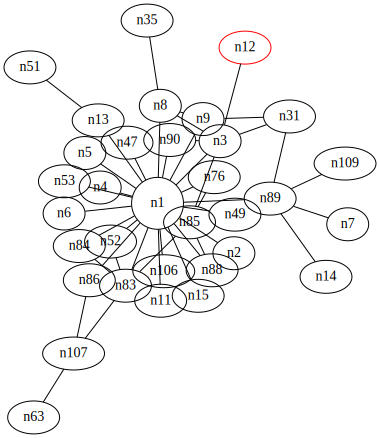

In [30]:
display(A[4])


Now that we have some idea about how the networ looks, it is a good idea to exploe some of the imporant properties of the network. The 3 important characteristics and their evolution
over the phases will be the degree centrality, the betweennes centrality and the eigen centrality. The idea behind the use of the network properties and relatedness to actors in the criminal network
was explored in [Modeling Verdict Outcomes Using SocialNetwork Measures: The Watergate andCaviar Network Cases](https://www.researchgate.net/publication/292304919_Modeling_Verdict_Outcomes_Using_Social_Network_Measures_The_Watergate_and_Caviar_Network_Cases).

Let's explore the centrality measures fot the node n12


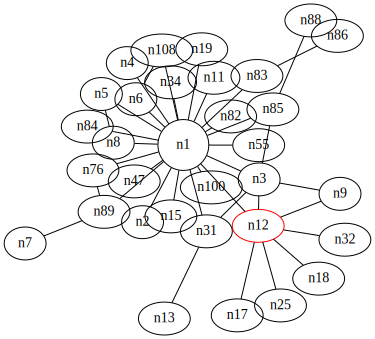

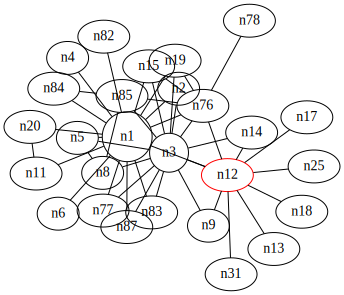

In [31]:
display(A[5])
display(A[6])


In [32]:
n_12_evol = {"betweeness":[],"degree": [],"eigen" : []}
for i in range(1,12): 
    bet_c = nx.get_node_attributes(G[i],"betweeness").get("n12")
    degree = nx.get_node_attributes(G[i],"degree").get("n12")
    eigen = nx.get_node_attributes(G[i],"eigen").get("n12")

    # just a check if the node occurs in the graph 
    if degree is not None:
      n_12_evol["degree"].append(degree)
      n_12_evol["betweeness"].append(bet_c)
      n_12_evol["eigen"].append(eigen)

    else:
      n_12_evol["degree"].append(0)
      n_12_evol["betweeness"].append(0)
      n_12_evol["eigen"].append(0)




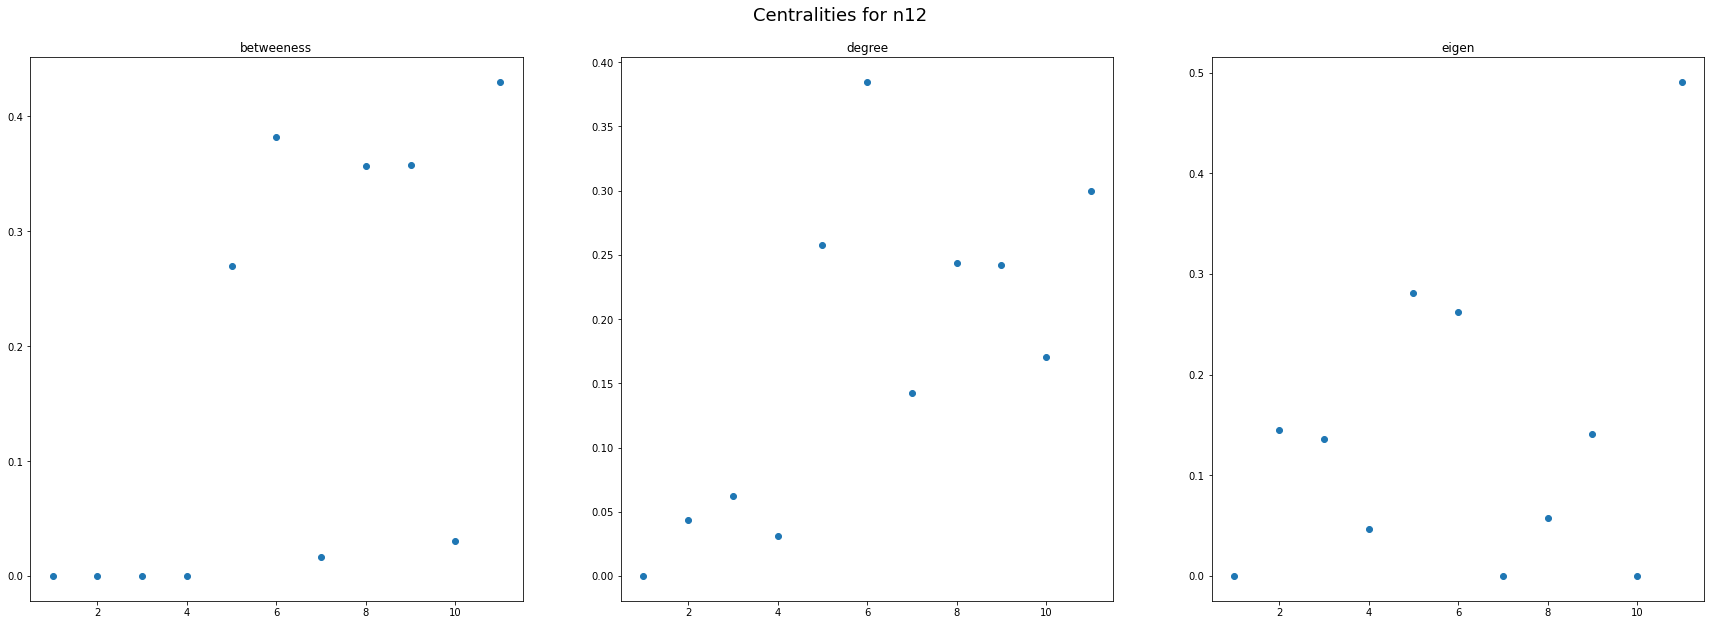

In [33]:
# creating plot grid
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(30, 10),)
fig.subplots_adjust(hspace=0.2)
#title
fig.suptitle("Centralities for n12", fontsize=18, y=0.95)
for i,ax in zip(["betweeness","degree","eigen"],axs.ravel()):
    ax.scatter(range(1,12),n_12_evol[i])
    ax.title.set_text(i)


## The betweenness centrality

In [34]:
%%latex 
\begin{equation}
\sum_{s\neq v\neq t}^{}\frac{\sigma_{st}(v)}{\sigma_{st}}
\end{equation} 



<IPython.core.display.Latex object>

$\sigma_{st}(v)$ - is a number of shortest paths from node s to node t through node v 

$\sigma_{st}$ - is a total number of shortest paths from node s to node t through node v

This measure in social netwrok can be interpreted as a importance of the node. The number of shortest paths here means that the node is easily in contact with other nodes. 
In case of the n12(Ernesto Morales : Principal organizer of the cocaine import, intermediary between the Colombians and the Serero organization) we can say that his outreach to different people 
grew, making him more essential person in the netwrok due to his connections. 


## The degree centrality

the degree centrality is one of the most basic centralities. it measure the number of edges the node has - how well is it connected. To make it more comparable we could weight the measure by the total
number of connections to make it more comparable

## The eigenvector centrality

The eigen centrality is another centrality measure we will be looking at. It comes from the idea that we want to add some weights on the actors of the network. Ideally the important actor is related to many other important
actors in the network. 

Given the degree centrality definition:

In [35]:
%%latex 
\begin{equation}
    \sum_{j}^{}v_{ij} = d_{i} 
\end{equation} 
    
    

<IPython.core.display.Latex object>

We would like ot adjust the expression to assign weights. Natural way of creating this new measure $x_i$ this would be as follows:

In [36]:
%%latex 
\begin{equation}
    \ x_i =  \frac{1}{\lambda}\sum_j a_{ij}.x_j
\end{equation} 
    
rearanging this we will get

\begin{equation}
    \ \lambda . x_i =  \sum_j a_{ij}.x_j  
\end{equation} 
rewriting this in a matrix form will give us the eigenvalue equation

<IPython.core.display.Latex object>

Understanding where this measures came from, we can understand a little better what they are trying to tell us about the network. In the above example, the node n12, did not necessarilly connect more with the important nodes.(no clear trend in eigenvector centraity)
As his role suggest he had some authority over chunk of the network that without him would either have poor, or no connectivity at all. This is what betweenness centrality is telling us.

In [37]:

def centrality_over_time(measure = "eigen"):
    """
    Assigns given centrality to the nodes, nodes not found in the given phase are set to 0
    Inputs: valid measure input is the name of the measure set by nx.set_node_attributes()
    Outputs the dictionary where keys are the nodes and value is the list of centralities over phases
    """
    un_nodes = [] # init list of unique nodes
    for i in range(1,12):
        un_nodes += list(G[i].nodes) # append nodes for every phase
    un_nodes = list(set(un_nodes)) # keep only unique nodes
    init_centrality = [[0 for i in range(0,12)] for i in range(len(un_nodes))] # init the centrality per phase to 0
    centtrality_t = dict(zip(un_nodes, init_centrality)) # creates a dictinary in the output format

    for i in range(1,12):
        centrality = nx.get_node_attributes(G[i],measure) 
        for k,v in centrality.items():
            centtrality_t[k][i] = v # assignt the centrality to the right node at the right phase
    return (centtrality_t)

In [38]:
eigencentrality_t = centrality_over_time("eigen")
between_t = centrality_over_time("betweeness")
degree_t = centrality_over_time("degree")

In [39]:

def plot_centrality(centrality,return_fig = False):
    """
    Takes the output of the centrality_over_time() and creates a plot showing the 
    evolution of the centrality over time 
    """

    fig = go.Figure()
    for i in centrality.keys():      
        fig.add_trace(
        go.Scatter(x=list(range(1,12)),y=centrality[i][1:],name = i))
    if return_fig == True:
        return fig
    fig.show(renderer ="png")

    return None

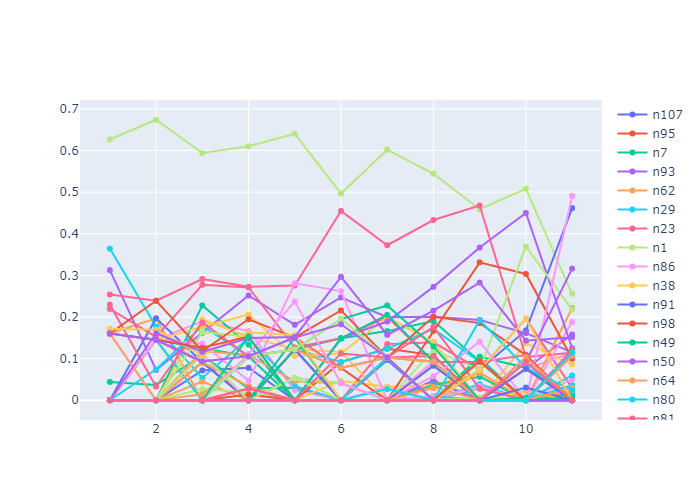

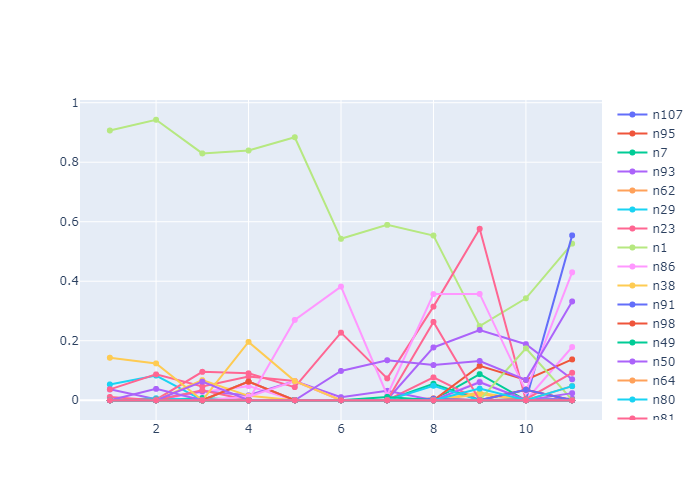

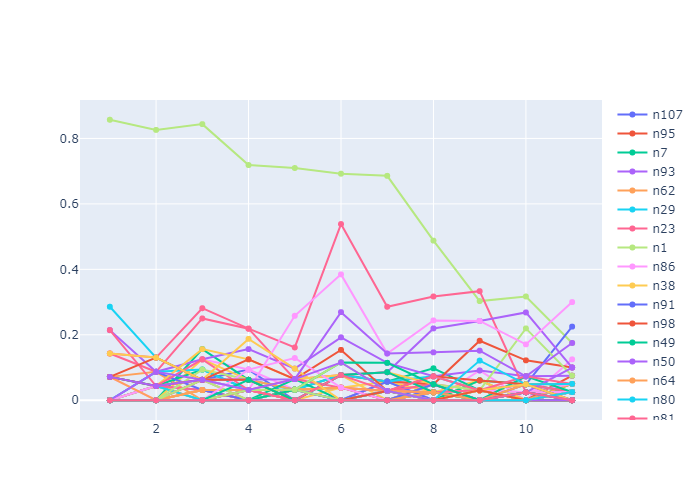

In [40]:
plot_centrality(eigencentrality_t)
plot_centrality(between_t)
plot_centrality(degree_t)


Let's try to play with plotly to make this a little more compact

In [42]:

plot = go.Figure()
for centrality in [eigencentrality_t,between_t,degree_t]:
    for i in centrality.keys():      
        plot.add_trace(
        go.Scatter(x=list(range(1,12)),y=centrality[i][1:],name = i))

# Add dropdown
plot.update_layout(
    updatemenus=[
        dict(
            buttons=list([
                dict(
                    args=["type", "scatter"],
                    label="Scatter Plot",
                    method="restyle"
                ),
                dict(
                    args=["type", "bar"],
                    label="Bar Chart",
                    method="restyle"
                )
            ]),
            direction="down",
            y = 1.3,
            x = 0
        ),
        dict(
            buttons=list([
                
                dict(
                    args=[{"visible":[True,False,False]},{"title": "Yahoo",
                            "annotations": []}],
                    label="Eigenvector centrality"
                    # method="restyle"
                ),
                dict(
                    args=[{"visible":[False,True,False]},{"title": "Yahoo",
                            "annotations": []}],
                    label="Betweenness centrality"
                    # method="restyle"
                ),
                dict(
                    args=[{"visible":[False,False,True]},{"title": "Yahoo",
                            "annotations": []}],
                    label="Degree centrality"
                    # method="restyle"-
                )
            ]),
            direction="down",
            y = 1.3,
            x=0.15
        ),
        
    ]
)






plot.show()


`Unfortunately the interactive plot created with plotly is not rendered in github`

In [49]:
# loading the data and transfroming to the graph representation using the networkX library
phases = {}
G = {}
A = {}
# looping through phases 
for i in range(1,12): 
  var_name = "phase" + str(i)
  file_name = "https://raw.githubusercontent.com/ragini30/Networks-Homework/main/" + var_name + ".csv"
  phases[i] = pd.read_csv(file_name, index_col = ["players"])
  phases[i].columns = "n" + phases[i].columns
  phases[i].index = phases[i].columns
  # creatiing networkX graph
  G[i] = nx.from_pandas_adjacency(phases[i],create_using = nx.DiGraph())
  G[i].name = var_name
  # calculating degree centrality ot be used as size he nodes
  hubs = nx.algorithms.link_analysis.hits(G[1], max_iter = 1000)[0]
  auth = nx.algorithms.link_analysis.hits(G[1], max_iter = 1000)[1]


  # setting the output of hits algorithm as node attribute
  nx.set_node_attributes(G[i], hubs, "hubs")
  nx.set_node_attributes(G[i], auth, "auth")




Since we have established the importance of the centralitiy heasures in our network let's plot the network highlighting nodes that score high in these measures.

The first plot will depict degree and eigenvector centraity


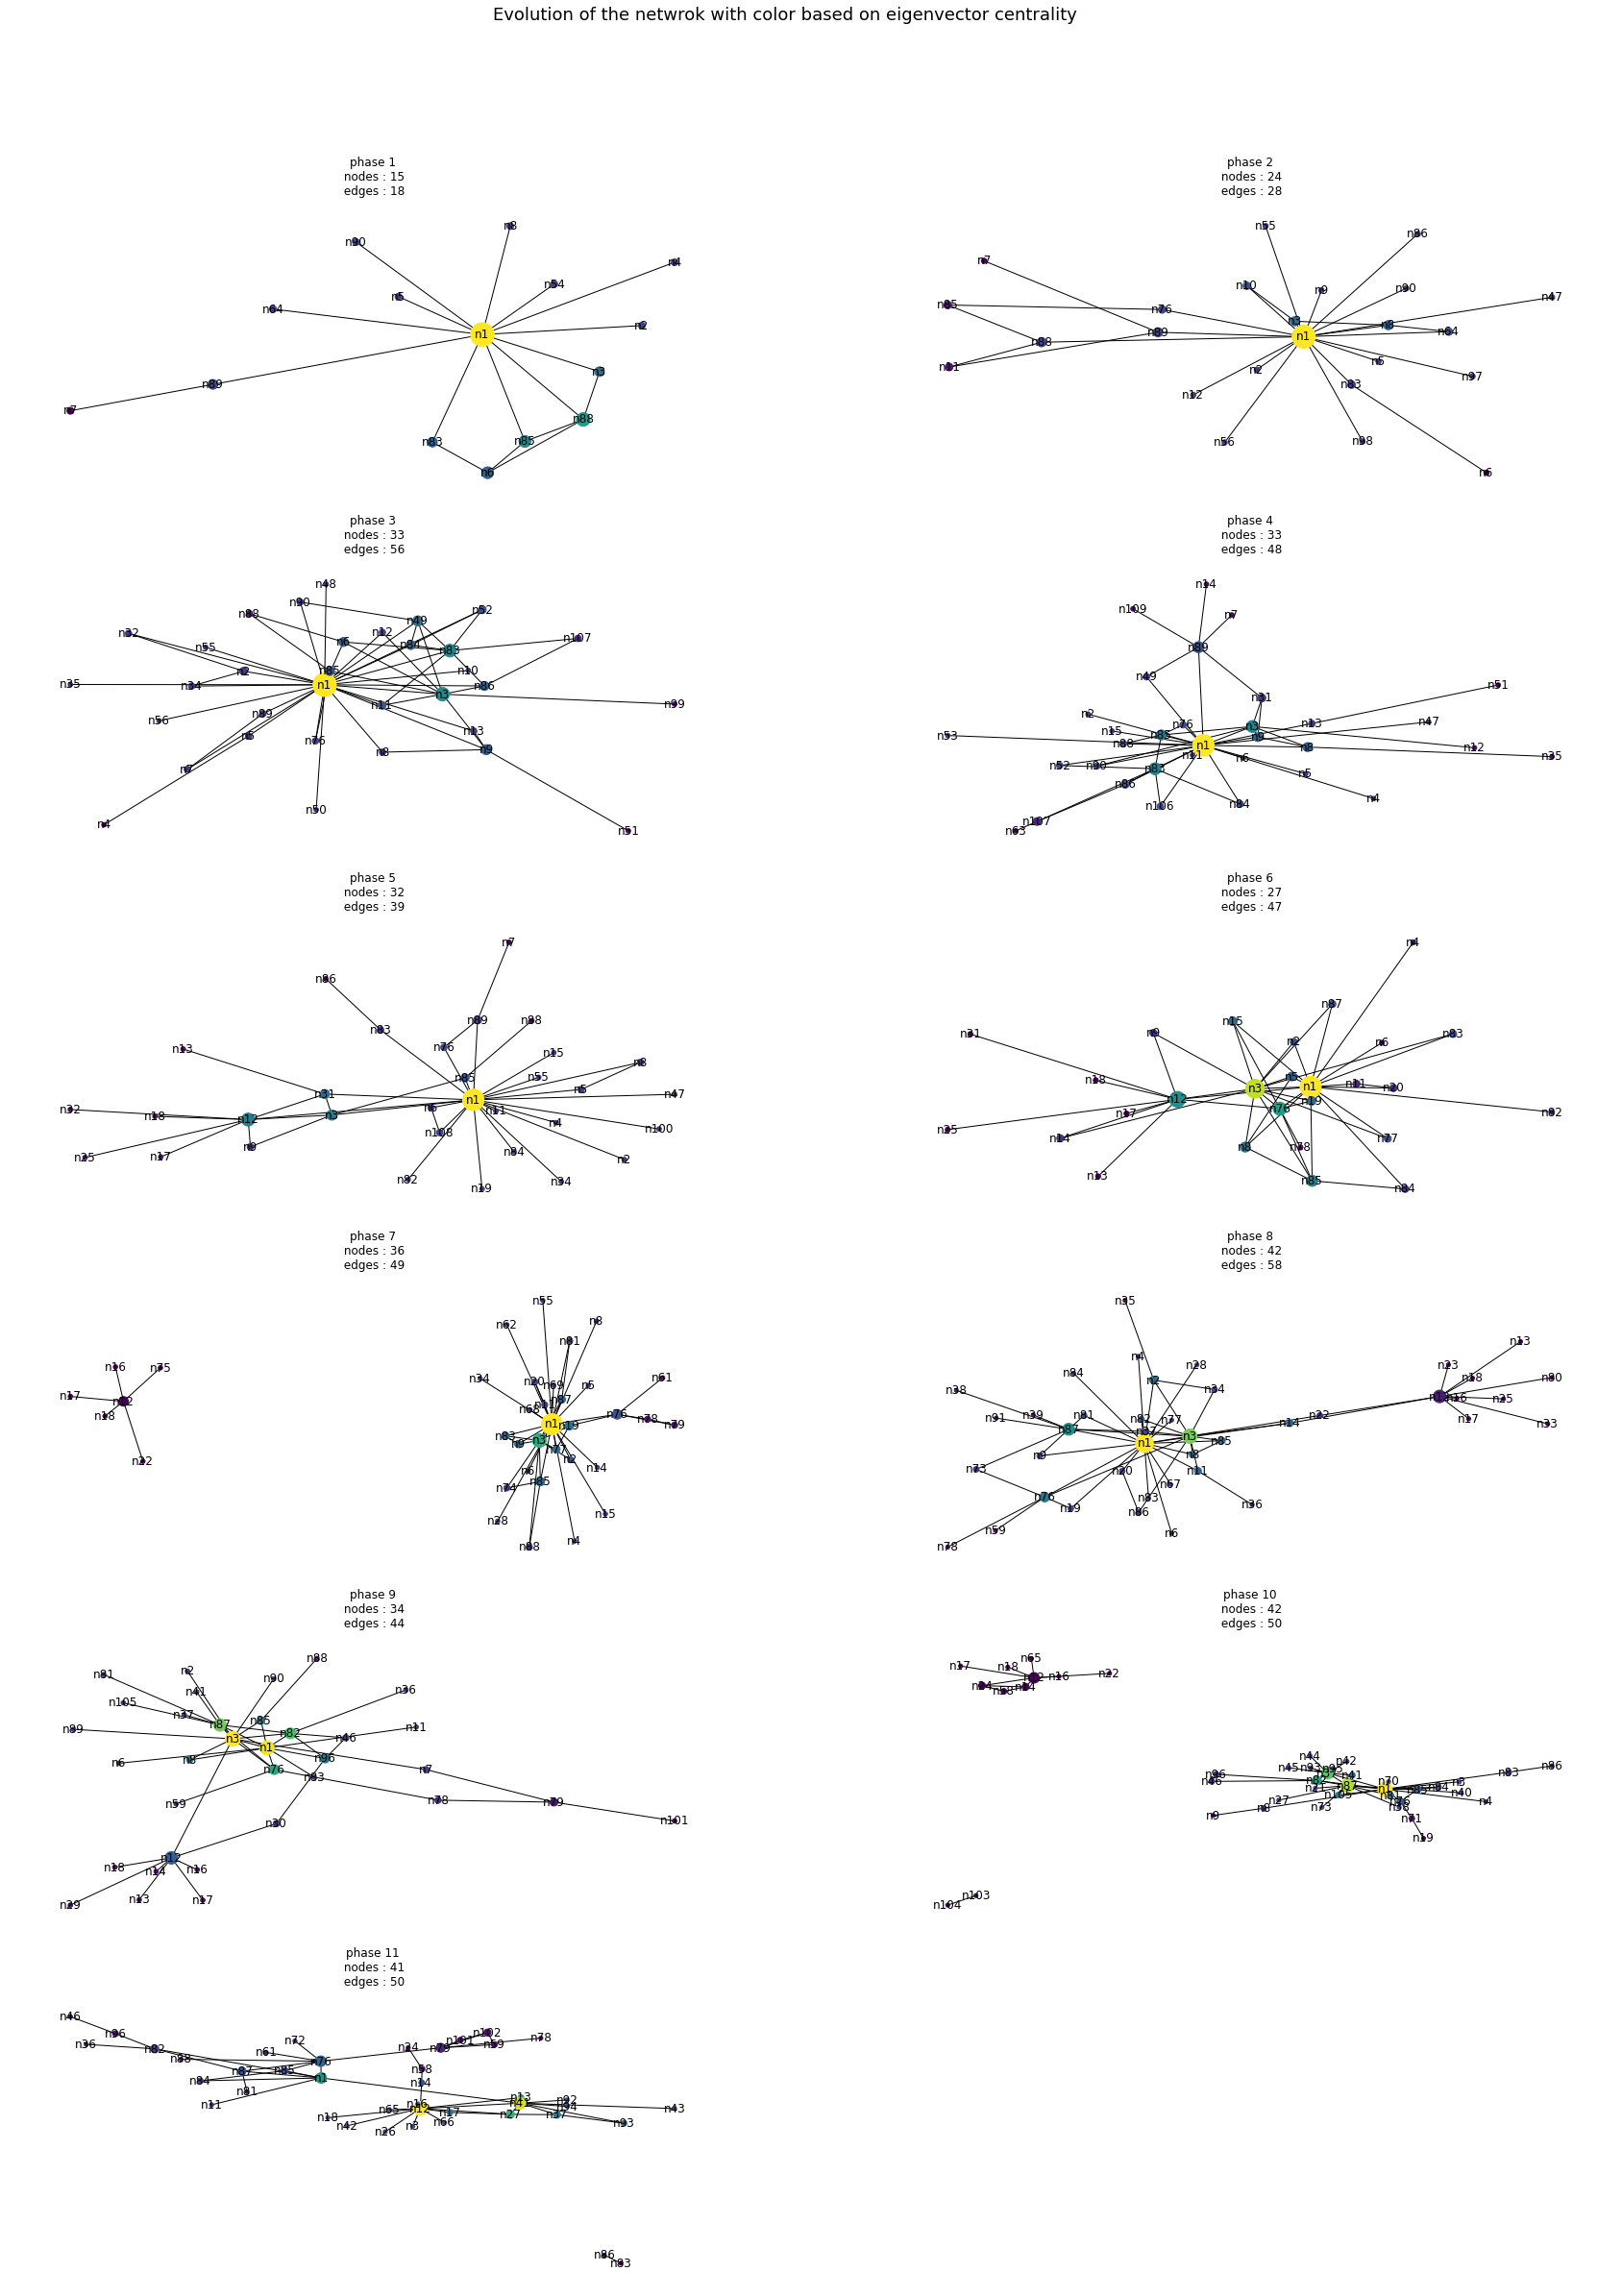

In [68]:
# creating plot grid
fig, axs = plt.subplots(squeeze=True,nrows=6, ncols=2, figsize=(30, 40),)
fig.subplots_adjust(hspace=0.2)
#title
fig.suptitle("Evolution of the netwrok with color based on eigenvector centrality", fontsize=18, y=0.95)

# loop throught the phases and draw them 
for i, ax in zip(range(len(A)), axs.ravel()):
    ax.set_title(f"phase {i+1}" + "\n" + f" nodes : {G[i+1].number_of_nodes()}"+ "\n" +
                 f" edges : {G[i+1].number_of_edges()}" )
    ns = nx.degree_centrality(G[i+1]) # get the degree centrality for each node
    eig = nx.eigenvector_centrality(G[i+1]) # get the degree centrality for each node
    spring_pos = nx.spring_layout(G[i+1])

    nx.draw(G[i+1], with_labels=True, ax=ax,node_size=[i*700 for i in ns.values()],node_color = [i for i in eig.values()])
  

fig.delaxes(axs[5,1]) # delete the empty ax in fig
fig.show()

The second one will depict the betweenness and degree centrality

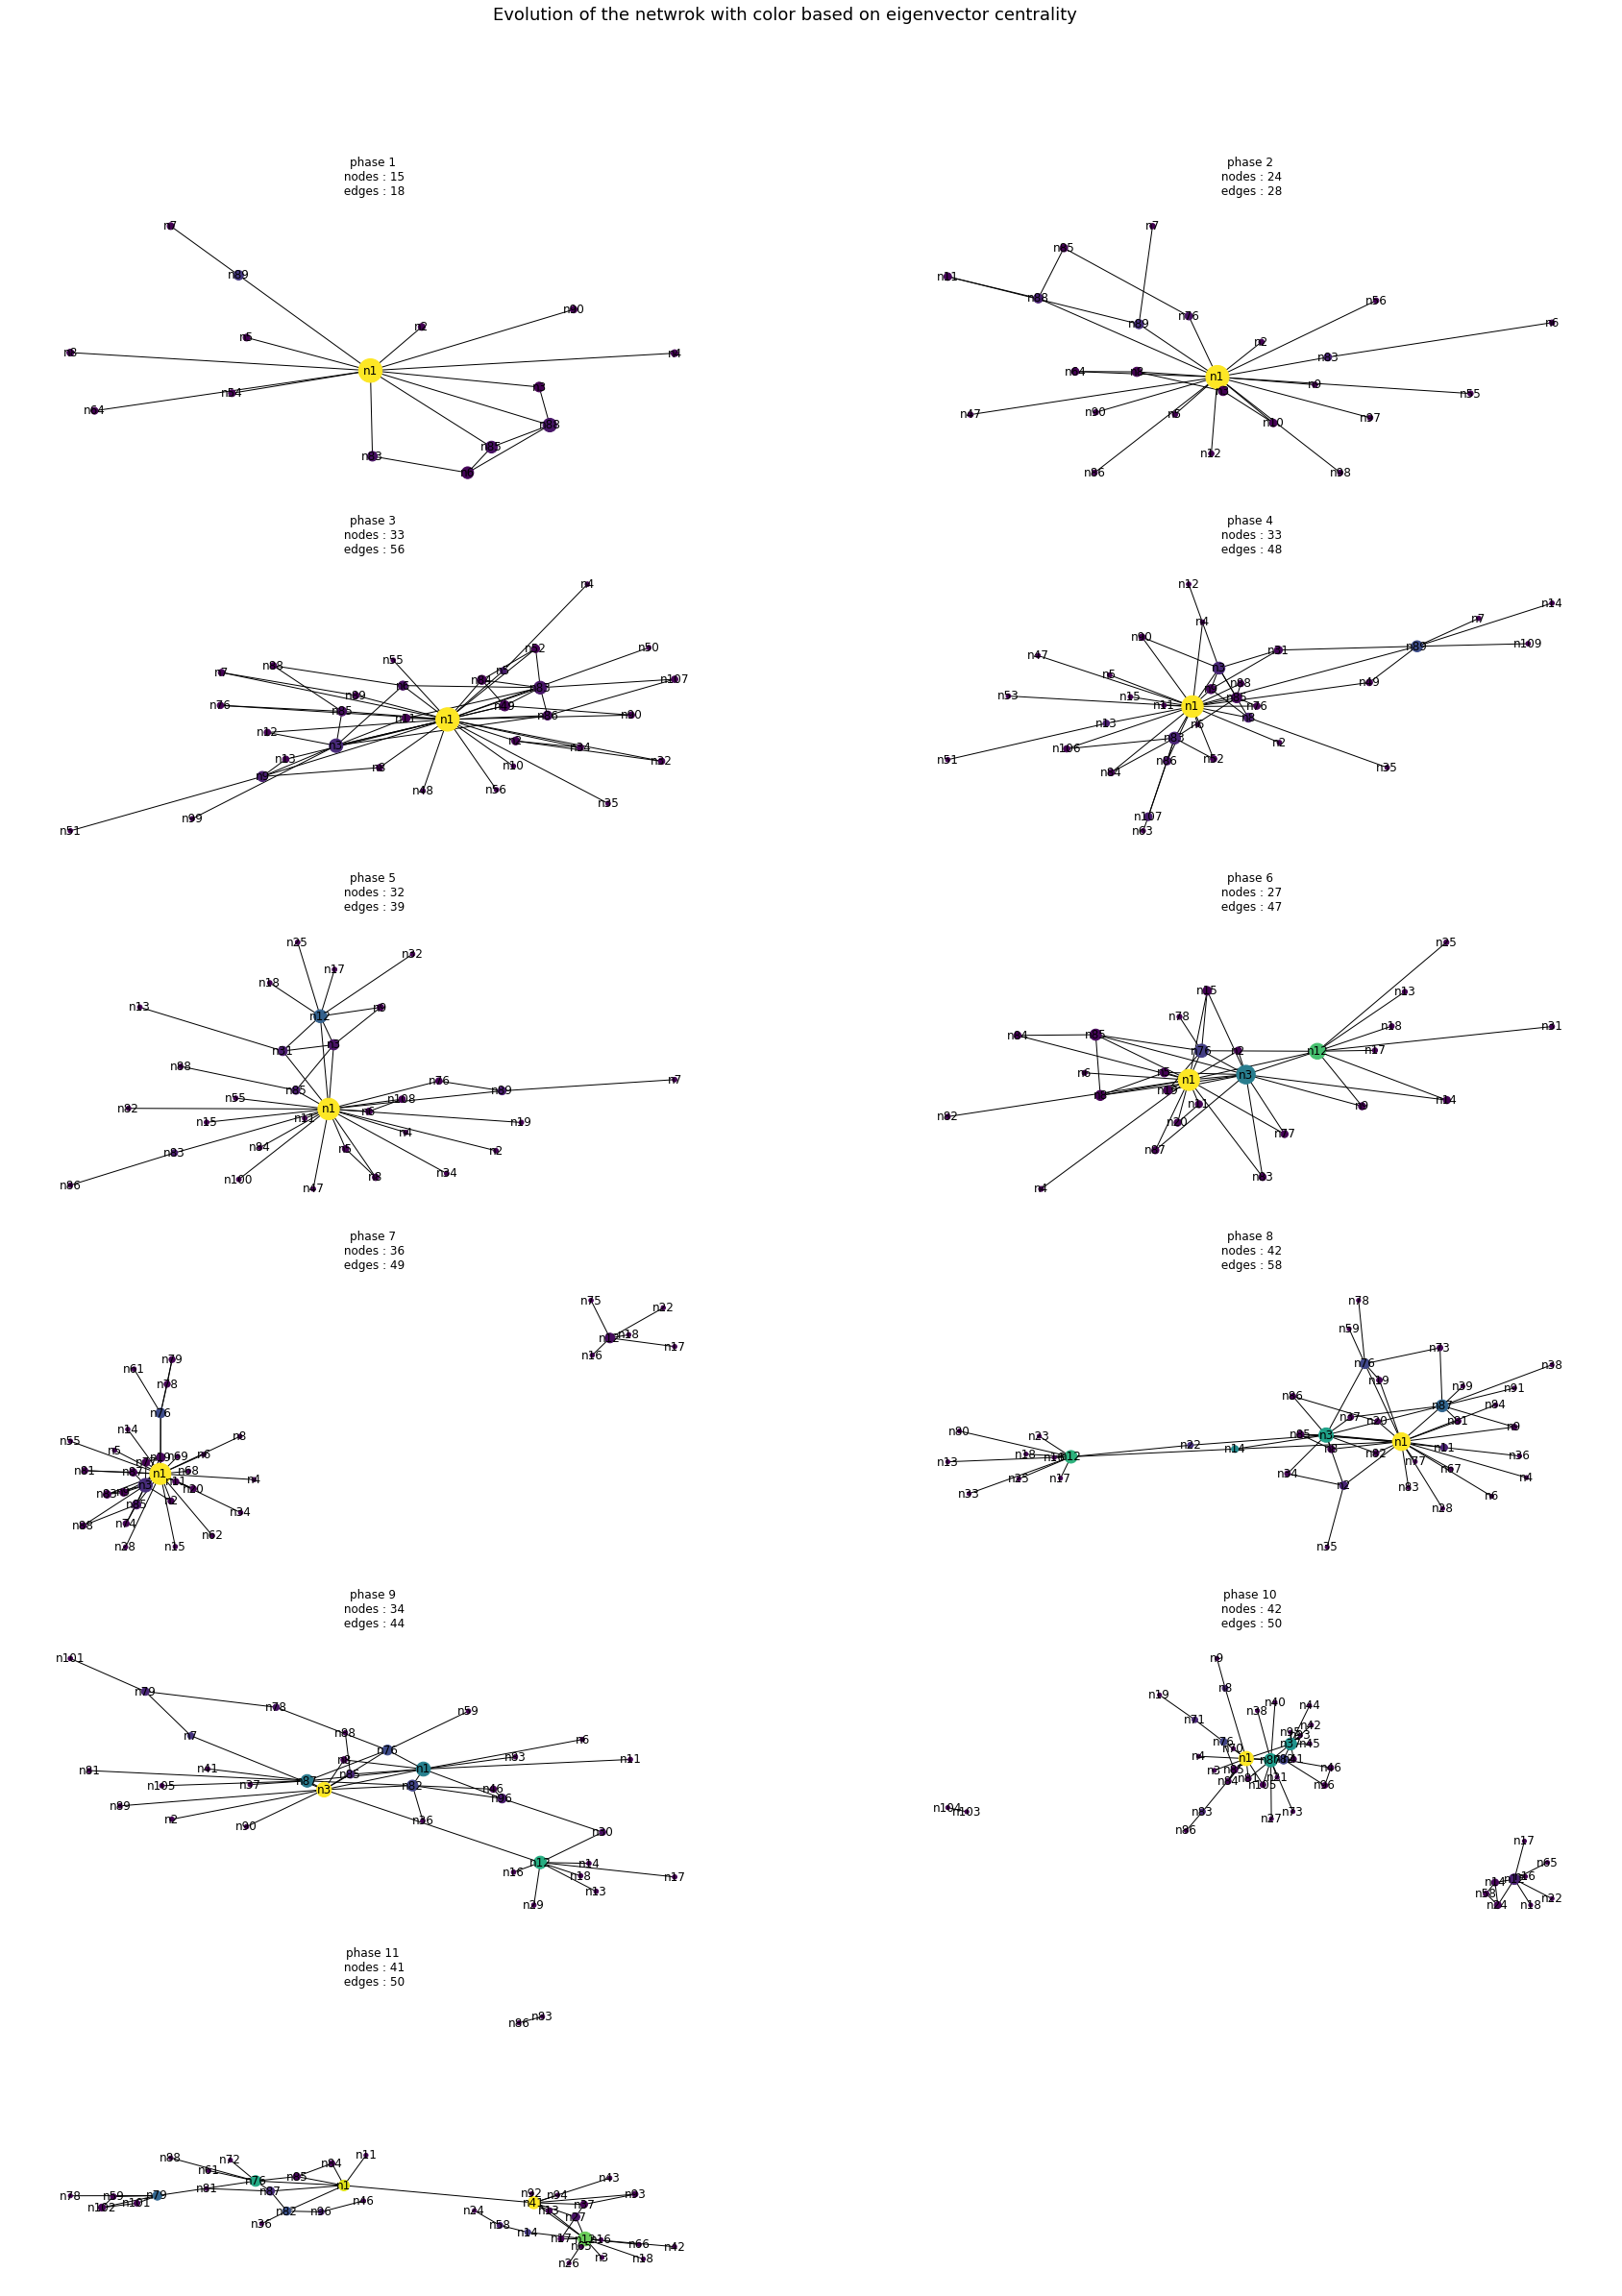

In [67]:
 # might take a little while

# creating plot grid
fig, axs = plt.subplots(squeeze=True,nrows=6, ncols=2, figsize=(30, 40),)
fig.subplots_adjust(hspace=0.2)
#title
fig.suptitle("Evolution of the netwrok with color set to be betweenness centrality and size be the degree", fontsize=18, y=0.95)

# loop throught the phases and draw them 
for i, ax in zip(range(len(A)), axs.ravel()):
    ax.set_title(f"phase {i+1}" + "\n" + f" nodes : {G[i+1].number_of_nodes()}"+ "\n" +
                 f" edges : {G[i+1].number_of_edges()}" )
    ns = nx.degree_centrality(G[i+1]) # get the degree centrality for each node
    bet = nx.betweenness_centrality(G[i+1]) # get the degree centrality for each node
    spring_pos = nx.spring_layout(G[i+1])
    nx.draw(G[i+1], spring_pos,with_labels=True, ax=ax,node_size=[i*700 for i in ns.values()],node_color = [i for i in bet.values()])



fig.delaxes(axs[5,1]) # delete the empty ax in fig
fig.show()

The third will consider the hubs and authorities

No handles with labels found to put in legend.


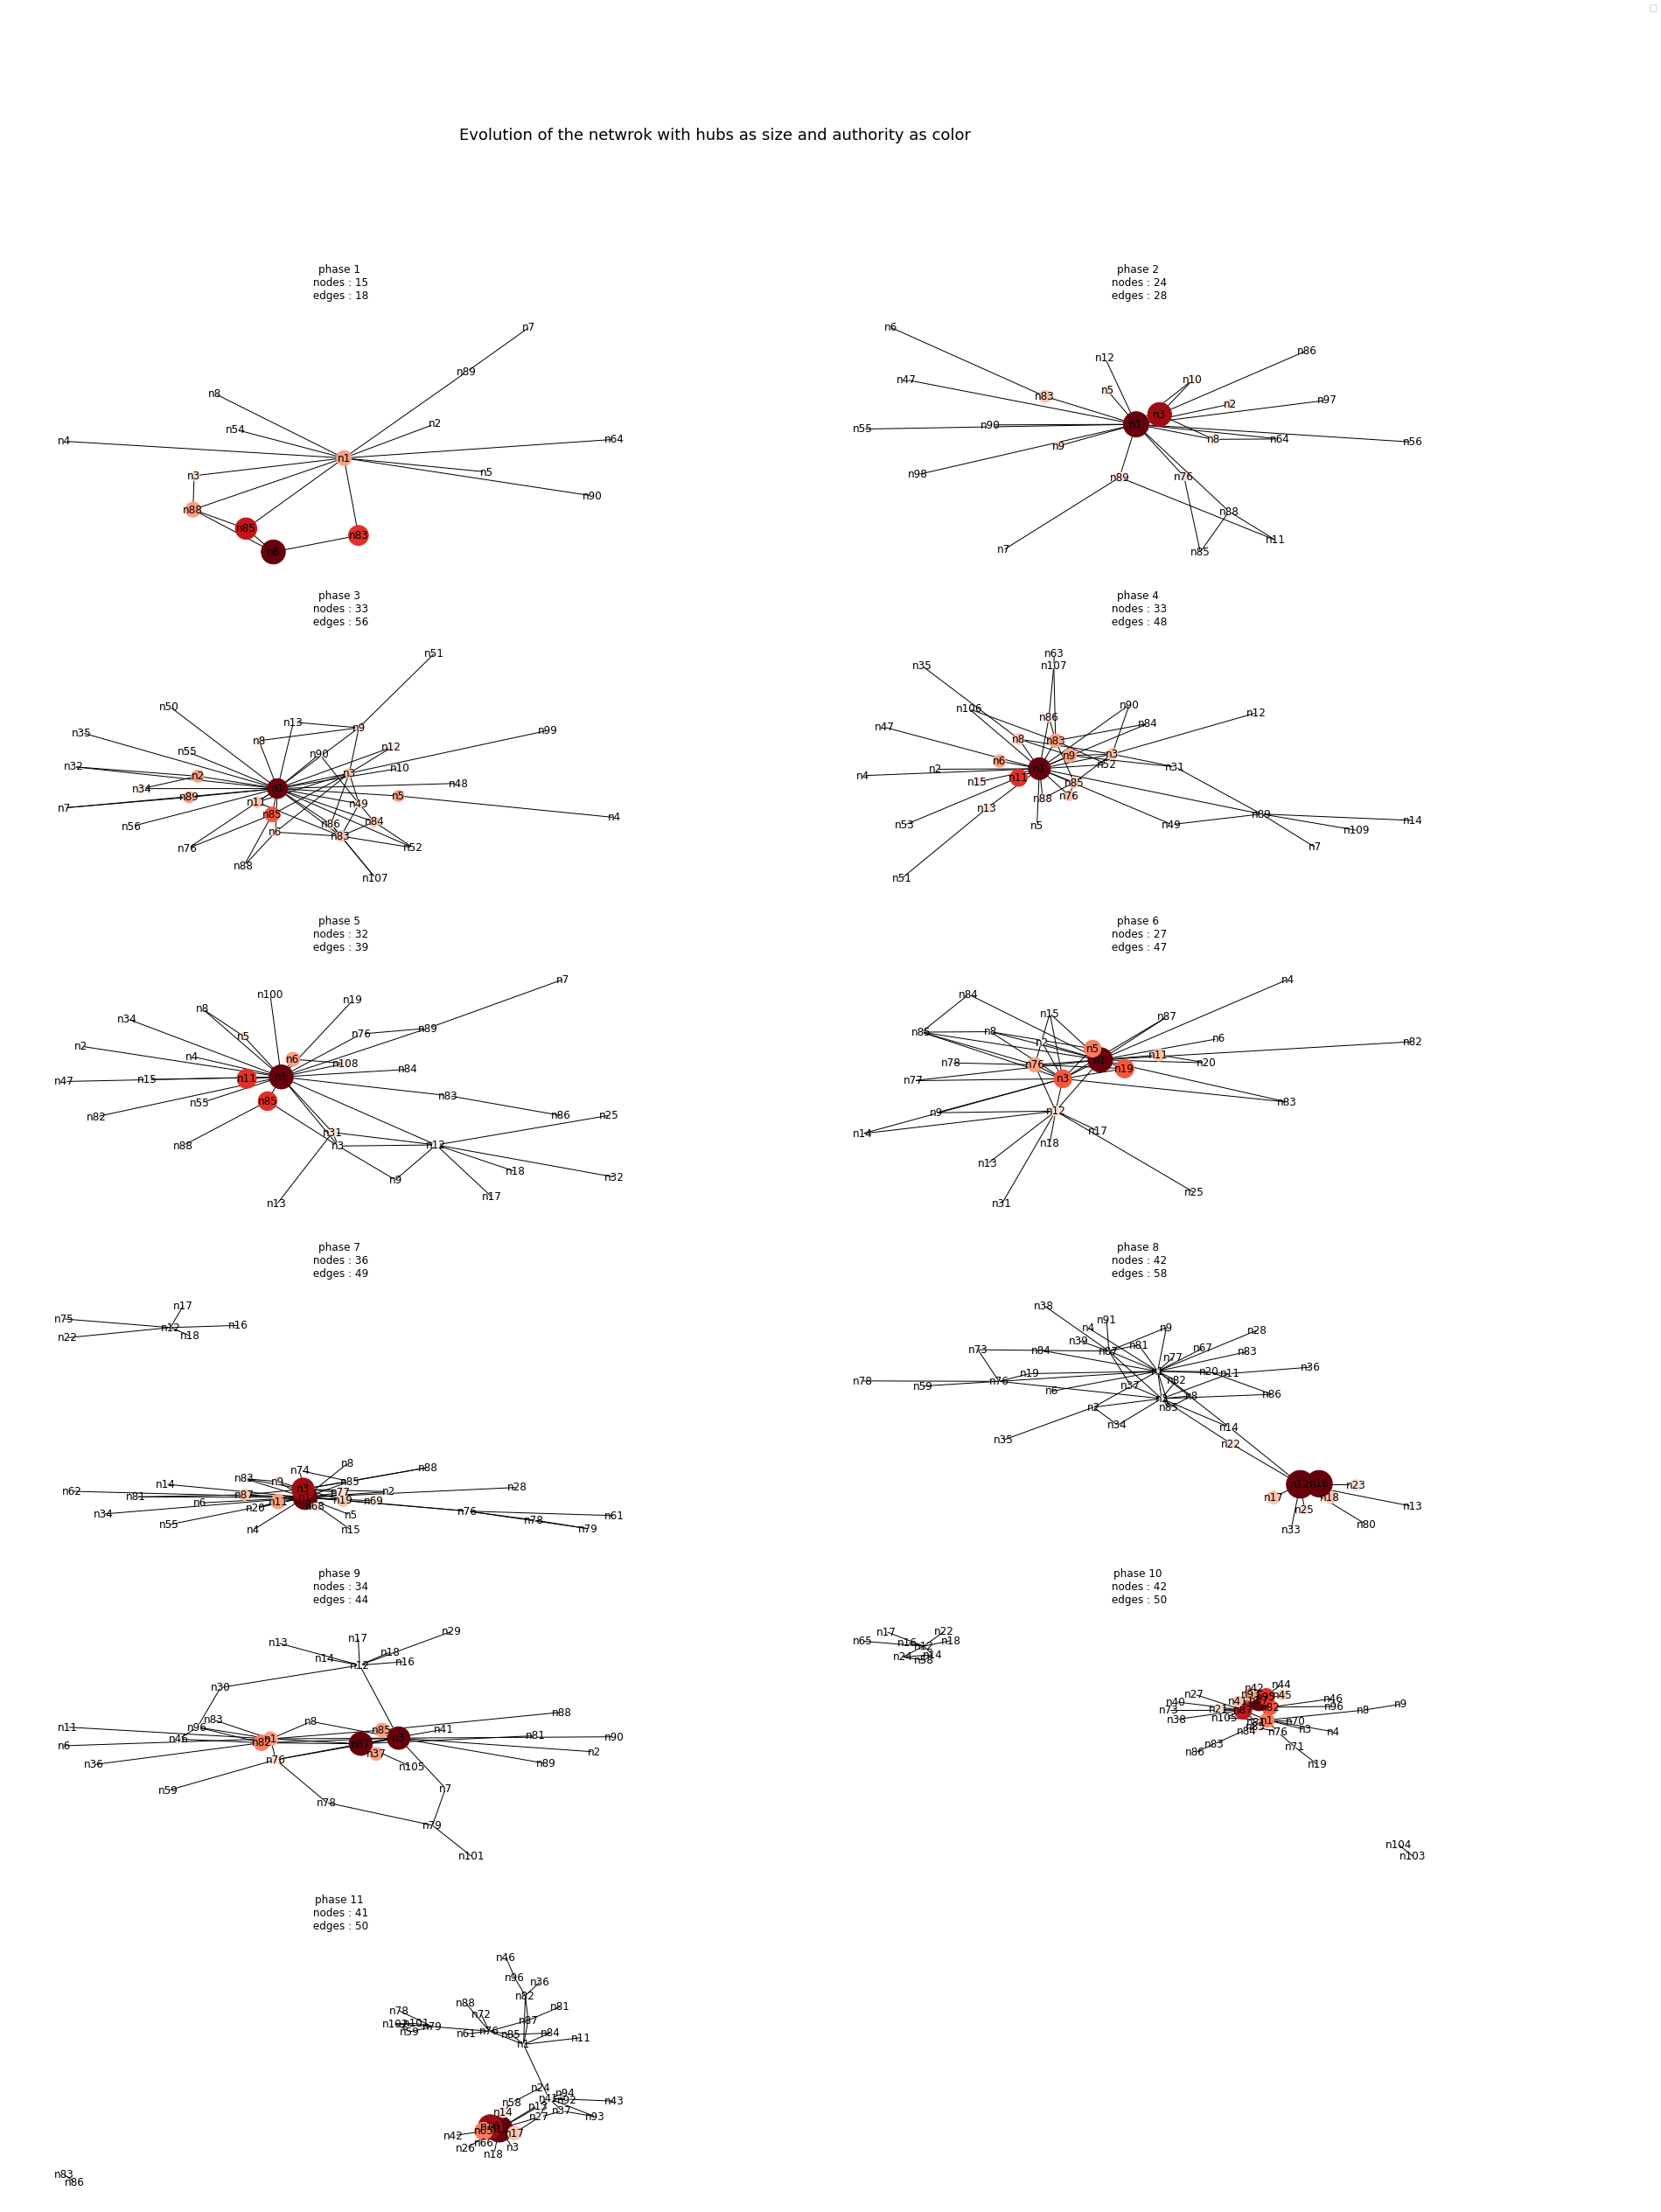

In [138]:

# creating plot grid
fig, axs = plt.subplots(squeeze=True,nrows=6, ncols=2, figsize=(30, 40),)
fig.subplots_adjust(hspace=0.2)
#title
fig.suptitle("Evolution of the netwrok with hubs as size and authority as color", fontsize=18, y=0.95)

# loop throught the phases and draw them 
for i, ax in zip(range(len(A)), axs.ravel()):
    ax.set_title(f"phase {i+1}" + "\n" + f" nodes : {G[i+1].number_of_nodes()}"+ "\n" +
                 f" edges : {G[i+1].number_of_edges()}" )
    hubs = nx.hits(G[i+1], max_iter = 100000)[0]
    auth = nx.hits(G[i+1], max_iter = 100000)[1]
    spring_pos = nx.spring_layout(G[i+1])
    cmap = cm.get_cmap('Reds', max(auth.values()) + 10)
    nx.draw(G[i+1], spring_pos,with_labels=True, ax=ax,node_size=[i*3000 for i in hubs.values()],node_color = [i for i in auth.values()],cmap=cmap)


fig.legend()
fig.delaxes(axs[5,1]) # delete the empty ax in fig
fig.show()

Besides the n1, n3 and n12, soem of the centralities are also poinitng at different nodes. Especially in the hubs and authorities graph, we can see some of the nodes that were not 
cosidered important using previous metrics. The nodes n37 , n87 ,n16, n85 were scoring quite high. The size is representing the hubs score. We can see that for the most part n1 enjoys quite high hub score. Around the phase 7 the size of the node n1 decreases, meaning that the "management responsibilities" were re-distributed to other nodes, especially n12 and n3. THe color tells us something about the authority score. In the first phase the highest authority falls to a node n6 - *Gaspard Lino: Broker in Spain*. Until phase 7 the highest authority afterwards fell on the node n1. Afterwards, since this phases marks the biggest seizure in terms of money lost, there seems to be a reorganization in the authority structure of the newtork.  N3 and some other actors take over after this phase as their authority (strength of the incoming links) is much higher than any other nodes.

We could also try to detect some commuinities ...

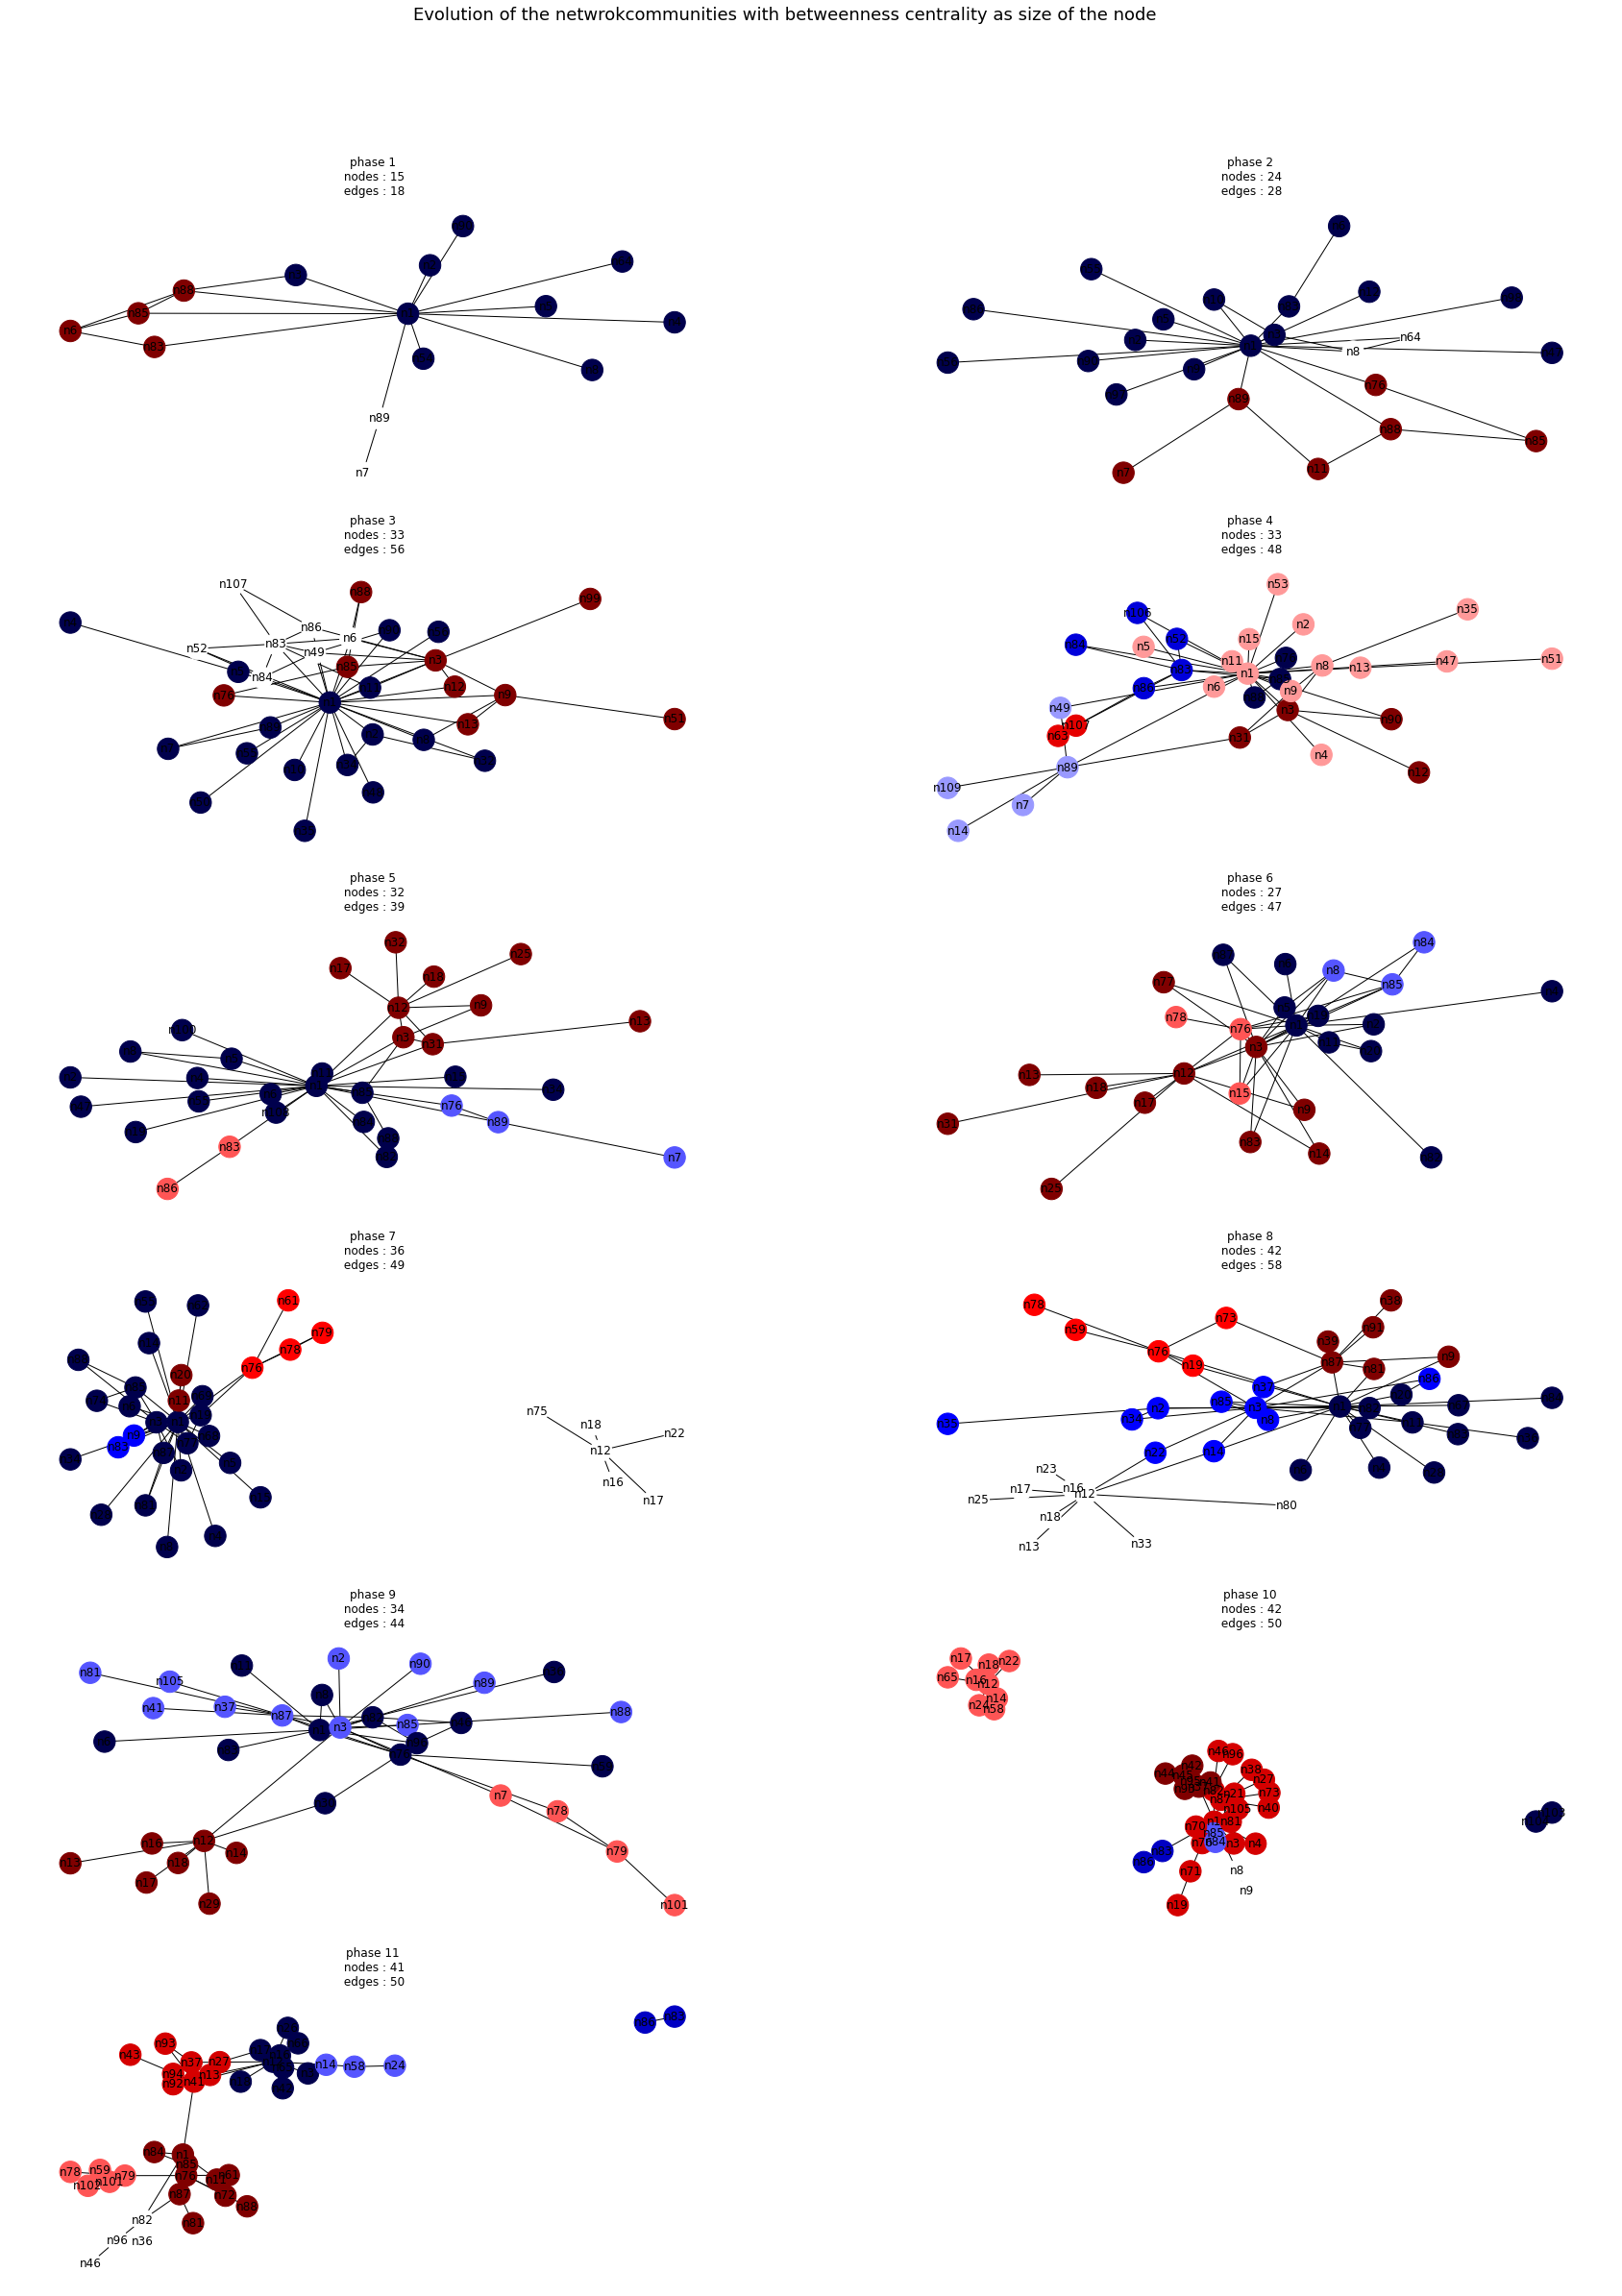

In [150]:


fig, axs = plt.subplots(squeeze=True,nrows=6, ncols=2, figsize=(30, 40),)
fig.subplots_adjust(hspace=0.2)
#title
fig.suptitle("Evolution of the netwrokcommunities with betweenness centrality as size of the node", fontsize=18, y=0.95)

# loop throught the phases and draw them 
for i, ax in zip(range(len(A)), axs.ravel()):
    ax.set_title(f"phase {i+1}" + "\n" + f" nodes : {G[i+1].number_of_nodes()}"+ "\n" +
                 f" edges : {G[i+1].number_of_edges()}" )
    spring_pos = nx.spring_layout(G[i+1])
    partition = community_louvain.best_partition(G[i+1])
    communities = [partition.get(node) for node in G[i+1].nodes()]
    cmap = cm.get_cmap('seismic', max(partition.values()) + 1)
    nx.set_node_attributes(G[i+1], partition, name='community')
    colors = [G[i+1].nodes[n]['community'] for n in G[i+1].nodes]
    nx.draw(G[i+1], spring_pos,with_labels=True, ax=ax,node_size=500,node_color = communities,cmap=cmap)
 

fig.delaxes(axs[5,1]) # delete the empty ax in fig
fig.show()

Let's see what are the communities for the last phase


6


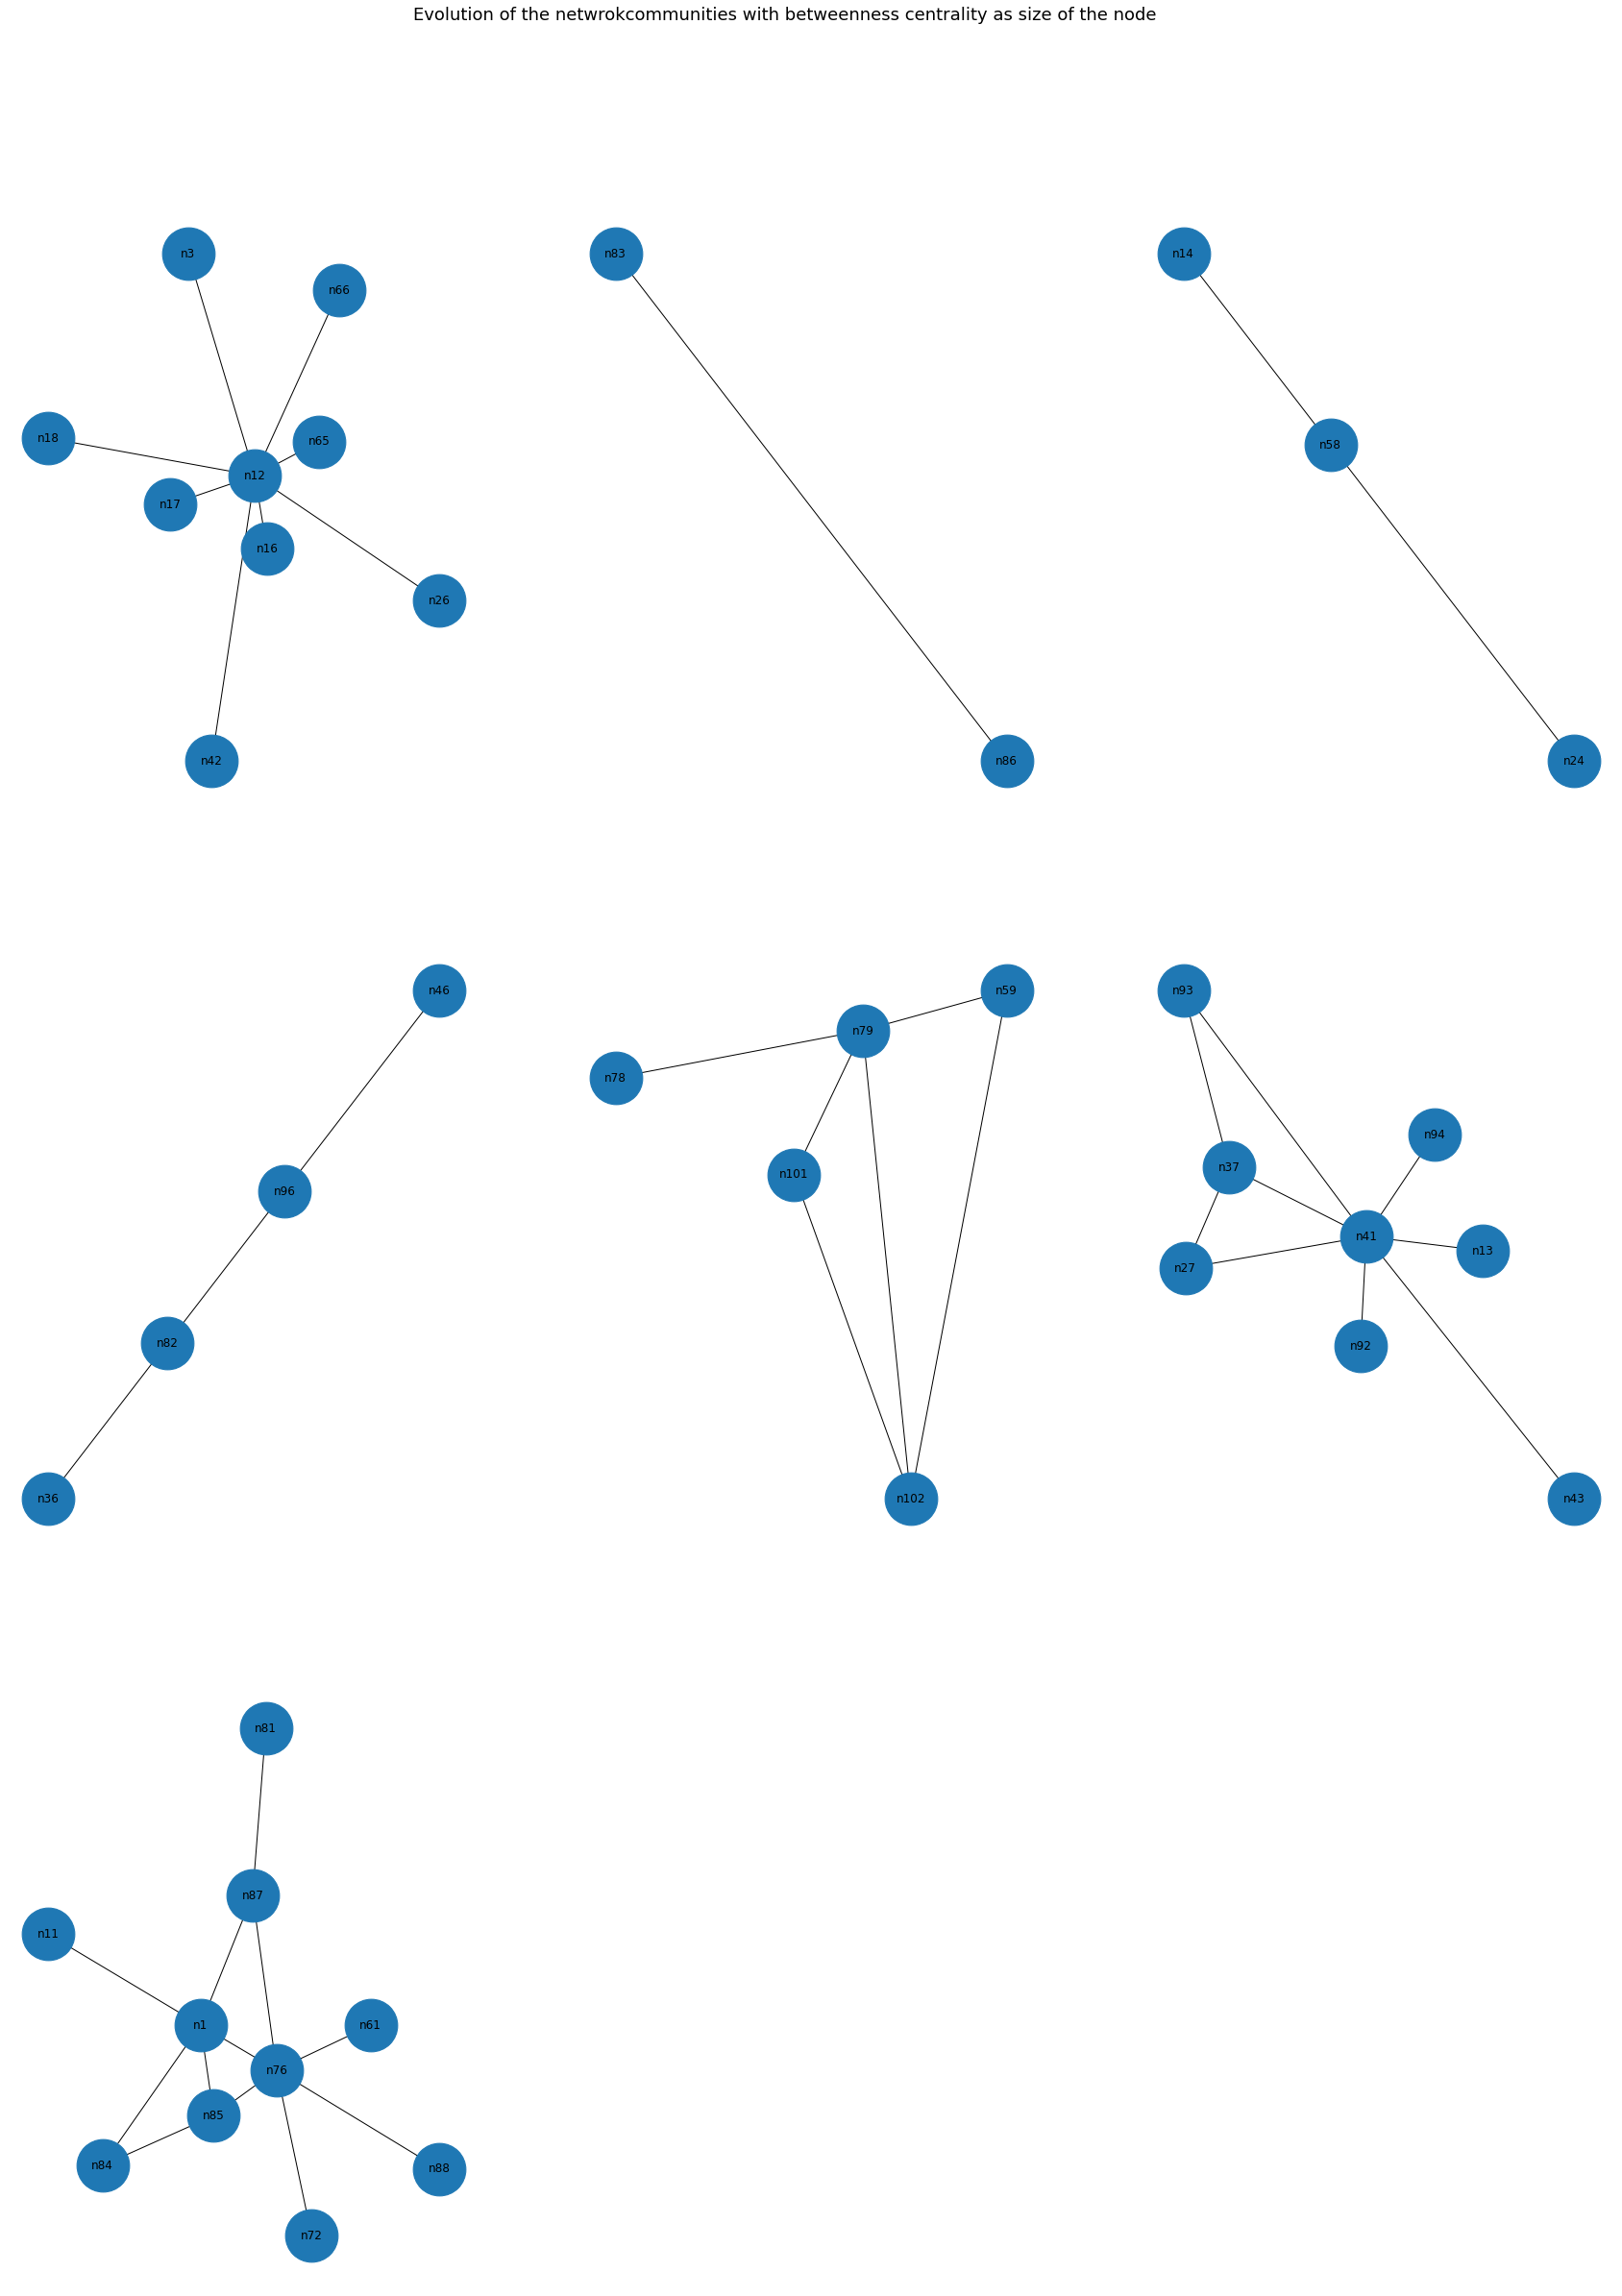

In [166]:

fig, axs = plt.subplots(squeeze=True,nrows=3, ncols=3, figsize=(30, 40),)
fig.subplots_adjust(hspace=0.2)
#title
fig.suptitle("Evolution of the netwrokcommunities with betweenness centrality as size of the node", fontsize=18, y=0.95)
comms = nx.get_node_attributes(G[11],"community")
print(max(comms.values()))
# loop throught the phases and draw them 
for i, ax in zip(range(max(comms.values())+1), axs.ravel()):
    selected_nodes = [n for n,v in G[11].nodes(data=True) if v['community'] == i]  
    H = G[11].subgraph(selected_nodes)
    nx.draw(H,with_labels=True,node_size=3000,ax=ax)

fig.delaxes(axs[2,1]) # delete the empty ax in fig
fig.delaxes(axs[2,2]) # delete the empty ax in fig
fig.show()

**the explanation of ids and the related persons behind it (the most important actors)**

*   Daniel Serero (n1) : Mastermind of the network.

*   Pierre Perlini (n3) : Principal lieutenant of Serero, he executes Serero's instructions.

*   Alain (n83) and Gérard (n86) Levy : Investors and transporters of money.

*   Wallace Lee (n85) : Takes care of financial affairs (accountant).

*   Gaspard Lino (n6): Broker in Spain.

*   Samir Rabbat (n11): Provider in Morocco.

*   Lee Gilbert (n88): Trusted man of Wallace Lee (became an informer after the arrest).

*   Beverly Ashton (n106): Spouse of Lino, transports money and documents.

*   Antonio Iannacci (n89): Investor.

*   Mohammed Echouafni (n84): Moroccan investor.

*   Richard Gleeson (n5), Bruno de Quinzio (n8) and Gabrielle Casale (n76) : Charged with recuperating the marijuana.

*   Roderik Janouska (n77): Individual with airport contacts.

*   Patrick Lee (n87): Investor.

*   Salvatore Panetta (n82): Transport arrangements manager.

*   Steve Cunha (n96): Transport manager, owner of a legitimate import company (became an informer after the arrest).

*   Ernesto Morales (n12): Principal organizer of the cocaine import, intermediary between the Colombians and the Serero organization.

*   Oscar Nieri (n17): The handyman of Morales.

*   Richard Brebner (n80): Was transporting the cocaine from the US to Montréal.

*   Ricardo Negrinotti (n33): Was taking possession of the cocaine in the US to hand it to Brebner.

*   Johnny Pacheco (n16): Cocaine provider.